# Tutorium DSCB 230

fj

### 29.04.2022

### Aufgabe 2 Time Series Analysis mit Pandas

Sie haben verschiedene Temperatursensoren installiert, die die Temperatur im 15-Minuten-Takt messen. Jeder Sensor speichert dabei zwei Werte in einer CSV-Datei ab. Sie finden diese Sensordaten in "sensor1.csv", "sensor2.csv" und "sensor3.csv".

*Hinweis:* Sollten Sie nicht weiterkommen, bzw. wissen Sie nicht, welche Methoden Sie verwenden können, schauen Sie sich die Hinweise am Ende des Notebooks an.

#### 1) Einlesen der Daten
- Ihre erste Aufgabe ist es jede CSV-Datei als ein pandas DataFrame einzulesen und anschließend zu einem DataFrame zu kombinieren.
- Passen Sie den Datentyp des Zeitstempels an und setzen Sie die Indizes des DataFrames auf die Werte der Zeitstempel

In [7]:
import pandas as pd

In [8]:
# Erzeugen der Data-Frames

sensor1 = pd.read_csv("sensor1.csv",
                 sep=";",
                 decimal=",",
                 header=0)

sensor2 = pd.read_csv("sensor2.csv",
                 sep=";",
                 decimal=",",
                 header=0)

sensor3 = pd.read_csv("sensor3.csv",
                 sep=";",
                 decimal=",",
                 header=0)

In [9]:
# Mergen der Sensordaten 

temperatures = sensor1.merge(sensor2, on="time").merge(sensor3, on="time")
temperatures.head()

,time,sensor1_1,sensor1_2,sensor2_1,sensor2_2,sensor3_1,sensor3_2
0,06:00:00,14.3,13.7,14.2,14.3,13.5,13.6
1,06:15:00,14.5,14.5,14.0,15.0,14.5,14.7
2,06:30:00,14.6,15.1,14.8,15.3,14.0,14.2
3,06:45:00,14.8,14.5,15.6,15.2,14.7,14.6
4,07:00:00,15.0,14.9,15.7,15.6,14.0,15.3


In [10]:
# Anpassen des Datentypes von "time"

temperatures["time"] = pd.to_datetime(temperatures["time"])
temperatures.head()

,time,sensor1_1,sensor1_2,sensor2_1,sensor2_2,sensor3_1,sensor3_2
0,2022-04-28 06:00:00,14.3,13.7,14.2,14.3,13.5,13.6
1,2022-04-28 06:15:00,14.5,14.5,14.0,15.0,14.5,14.7
2,2022-04-28 06:30:00,14.6,15.1,14.8,15.3,14.0,14.2
3,2022-04-28 06:45:00,14.8,14.5,15.6,15.2,14.7,14.6
4,2022-04-28 07:00:00,15.0,14.9,15.7,15.6,14.0,15.3


In [11]:
# Setzen von "time" als Index

temperatures = temperatures.set_index("time")
temperatures.head()

,sensor1_1,sensor1_2,sensor2_1,sensor2_2,sensor3_1,sensor3_2
time,,,,,,
2022-04-28 06:00:00,14.3,13.7,14.2,14.3,13.5,13.6
2022-04-28 06:15:00,14.5,14.5,14.0,15.0,14.5,14.7
2022-04-28 06:30:00,14.6,15.1,14.8,15.3,14.0,14.2
2022-04-28 06:45:00,14.8,14.5,15.6,15.2,14.7,14.6
2022-04-28 07:00:00,15.0,14.9,15.7,15.6,14.0,15.3


#### 2) Zugriff auf Daten der Time Series
- Geben Sie alle Sensordaten um 7 Uhr aus
- Geben Sie alle Sensordaten zwischen 8 und 10 Uhr aus

In [12]:
import datetime
datum = datetime.datetime.now().date()

In [28]:
temperatures.loc[f"{datum} 07:00:00"] 

# Referenzierung über "datum" hier nur notwendig, da beim Anpassen des Datentypes (oben)
# der aktuelle Tag genommen wird

sensor1_1                  15.0
sensor1_2                  14.9
sensor2_1                  15.7
sensor2_2                  15.6
sensor3_1                  14.0
sensor3_2                  15.3
durchschnitt               15.1
gleitender_durchschnitt    15.0
temp_delta                  0.2
Name: 2022-04-28 07:00:00, dtype: float64

In [14]:
temperatures.loc[f"{datum} 08:00:00":f"{datum} 10:00:00"]

,sensor1_1,sensor1_2,sensor2_1,sensor2_2,sensor3_1,sensor3_2
time,,,,,,
2022-04-28 08:00:00,15.7,15.6,15.9,16.2,15.4,15.4
2022-04-28 08:15:00,15.9,15.8,15.9,16.9,16.0,16.2
2022-04-28 08:30:00,16.1,15.7,16.1,15.9,14.9,15.2
2022-04-28 08:45:00,16.5,16.6,17.3,16.2,16.4,16.0
2022-04-28 09:00:00,16.8,17.3,17.7,17.8,15.9,16.1
2022-04-28 09:15:00,17.1,17.5,17.5,17.3,16.6,16.8
2022-04-28 09:30:00,17.7,18.2,18.2,18.6,16.9,17.4
2022-04-28 09:45:00,18.4,19.0,19.0,19.4,18.4,18.3
2022-04-28 10:00:00,19.0,19.7,18.8,18.9,17.5,18.9


#### 3) Berechnungen
- Berechnen Sie den Tagesdurchschnitt jedes Sensors
- Berechnen Sie den Durchschnitt aller Sensoren und speichern Sie die Werte in einer extra Spalte
- Berechnen Sie den gleitenden Durchschnitt 5. Ordnung und speichern Sie die Werte in einer extra Spalte
- Berechnen Sie die Temperaturänderung des einfachen Durchschnitts pro Uhrzeit (Änderung zum vorherigen Durchschnitt)

In [15]:
# Tagesdurchschnitt je Sensor

temperatures.mean()

sensor1_1    19.775926
sensor1_2    19.757407
sensor2_1    19.840741
sensor2_2    20.187037
sensor3_1    19.181481
sensor3_2    19.437037
dtype: float64

In [16]:
# Durchschnitt je Uhrzeit

temperatures["durchschnitt"] = round(temperatures.mean(axis=1, numeric_only=True), 1)
temperatures.head()

,sensor1_1,sensor1_2,sensor2_1,sensor2_2,sensor3_1,sensor3_2,durchschnitt
time,,,,,,,
2022-04-28 06:00:00,14.3,13.7,14.2,14.3,13.5,13.6,13.9
2022-04-28 06:15:00,14.5,14.5,14.0,15.0,14.5,14.7,14.5
2022-04-28 06:30:00,14.6,15.1,14.8,15.3,14.0,14.2,14.7
2022-04-28 06:45:00,14.8,14.5,15.6,15.2,14.7,14.6,14.9
2022-04-28 07:00:00,15.0,14.9,15.7,15.6,14.0,15.3,15.1


In [17]:
# Gleitender Durchschnitt 5. Ordnung

temperatures["gleitender_durchschnitt"] = round(temperatures["durchschnitt"].rolling(5, center=True).mean(), 1)
temperatures.head()

,sensor1_1,sensor1_2,sensor2_1,sensor2_2,sensor3_1,sensor3_2,durchschnitt,gleitender_durchschnitt
time,,,,,,,,
2022-04-28 06:00:00,14.3,13.7,14.2,14.3,13.5,13.6,13.9,NaN
2022-04-28 06:15:00,14.5,14.5,14.0,15.0,14.5,14.7,14.5,NaN
2022-04-28 06:30:00,14.6,15.1,14.8,15.3,14.0,14.2,14.7,14.6
2022-04-28 06:45:00,14.8,14.5,15.6,15.2,14.7,14.6,14.9,14.9
2022-04-28 07:00:00,15.0,14.9,15.7,15.6,14.0,15.3,15.1,15.0


In [18]:
# Temperaturänderung des Durchschnitts

temperatures["temp_delta"] = temperatures.durchschnitt.diff().shift(0)
temperatures.head()

,sensor1_1,sensor1_2,sensor2_1,sensor2_2,sensor3_1,sensor3_2,durchschnitt,gleitender_durchschnitt,temp_delta
time,,,,,,,,,
2022-04-28 06:00:00,14.3,13.7,14.2,14.3,13.5,13.6,13.9,NaN,NaN
2022-04-28 06:15:00,14.5,14.5,14.0,15.0,14.5,14.7,14.5,NaN,0.6
2022-04-28 06:30:00,14.6,15.1,14.8,15.3,14.0,14.2,14.7,14.6,0.2
2022-04-28 06:45:00,14.8,14.5,15.6,15.2,14.7,14.6,14.9,14.9,0.2
2022-04-28 07:00:00,15.0,14.9,15.7,15.6,14.0,15.3,15.1,15.0,0.2


#### 4) Visualisieren
- Stellen Sie den Verlauf des Durchschnitts, sowie des gleitenden Durchschnitts jeweils als Liniendiagramm dar. 

*(Empfehlung: nutzen Sie aus Gründen der Übersichtlichkeit zwei verschiedene Diagramme)*

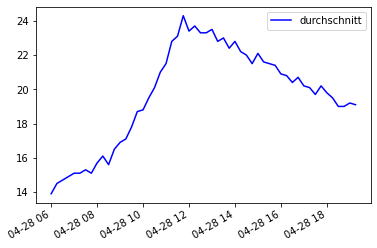

In [20]:
import matplotlib.pyplot as plt
plt.plot(temperatures.index, temperatures["durchschnitt"], "b", label = "durchschnitt")
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

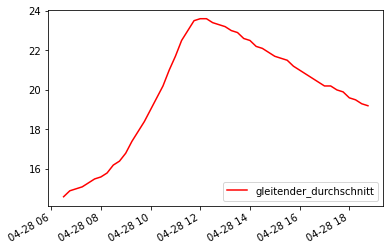

In [21]:
import matplotlib.pyplot as plt
plt.plot(temperatures.index, temperatures["gleitender_durchschnitt"], "r", label = "gleitender_durchschnitt")
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()


#### Hinweise
1) read_csv(), merge(), to_datetime(), set_index()
2) loc[value], loc[value:value2]
3) mean() -> axis-Attribut betrachten, rolling(), diff(), shift()